<a href="https://colab.research.google.com/github/AshishVeera/LJMU-VisualExplanation-COVID-19-detection/blob/main/Grad_CAM_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
cd '/content/drive/MyDrive'

/content/drive/MyDrive


In [4]:
from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import copy, pickle, os, time
import argparse
import pandas as pd
import os, copy, time, pickle
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
from torchvision.datasets.folder import IMG_EXTENSIONS
from torchvision.datasets import ImageFolder
from sklearn.metrics import confusion_matrix
import glob, pickle
import seaborn as sn
import plotly.graph_objects as go
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
from matplotlib import pyplot
import os
import PIL
import numpy as np
import torch
import torch.nn.functional as F
import torchvision.models as models
from torchvision import transforms
from torchvision.utils import make_grid, save_image

from gradcam.utils import visualize_cam
from gradcam import GradCAM, GradCAMpp

device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [5]:
model_resnet18 = torch.load('/content/drive/MyDrive/train_model_final_v3/covid3_resnet18')

In [6]:
model_resnet50 = torch.load('/content/drive/MyDrive/train_model_final_v3/covid3_resnet50')

In [7]:
model_densenet121 = torch.load('/content/drive/MyDrive/train_model_final_v3/covid3_densenet121')

In [8]:
model_densenet201 = torch.load('/content/drive/MyDrive/train_model_final_v3/covid3_densenet201')

In [9]:
model_resnet18.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [10]:
model_resnet50.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [11]:
model_densenet121.eval()

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [12]:
model_densenet201.eval()

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

COVID-Image_1

In [31]:
covid_img_path = '/content/drive/MyDrive/val/covid/41591_2020_819_Fig1_HTML.webp-day10.png'

In [32]:
covid_pil_img = PIL.Image.open(covid_img_path).convert('RGB')

In [33]:
covid_torch_img = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])(covid_pil_img).to(device)

In [34]:
covid_normed_torch_img = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(covid_torch_img)[None]

In [35]:
configs = [
    dict(model_type='resnet', arch=model_resnet18, layer_name='layer4'),
    dict(model_type='resnet', arch=model_resnet50, layer_name='layer4'),
    dict(model_type='densenet', arch=model_densenet121, layer_name='features_norm5'),
    dict(model_type='densenet', arch=model_densenet201, layer_name='features_norm5')
]

In [36]:
for config in configs:
    config['arch'].to(device).eval()

cams = [
    [cls.from_config(**config) for cls in (GradCAM, GradCAMpp)]
    for config in configs
]

In [37]:
images = [covid_torch_img.cpu()]
for gradcam, gradcam_pp in cams:
    mask, logit = gradcam(covid_normed_torch_img, class_idx=0)
    heatmap, result = visualize_cam(mask, covid_torch_img)

    mask_pp, logit2 = gradcam_pp(covid_normed_torch_img, class_idx=0)
    heatmap_pp, result_pp = visualize_cam(mask_pp, covid_torch_img)
     
    images.extend([result])
    
grid_image = make_grid(images, nrow=1)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2952: UserWarning:

nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.



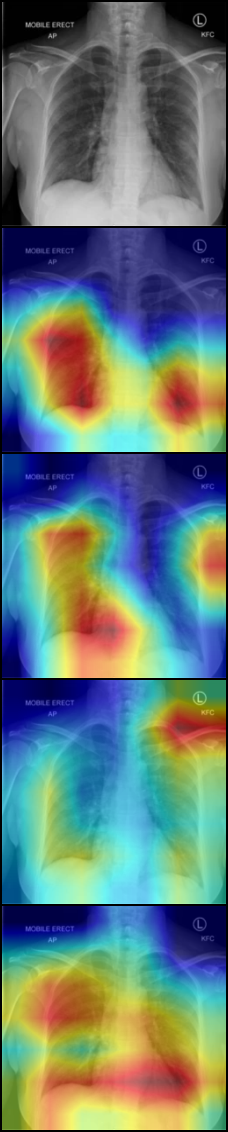

In [38]:
# Covid image for class idx 0
transforms.ToPILImage()(grid_image)

COVID-Image-2

In [39]:
covid_img_path ='/content/drive/MyDrive/val/covid/covid-19-infection-exclusive-gastrointestinal-symptoms-pa.png'

In [40]:
covid_pil_img = PIL.Image.open(covid_img_path).convert('RGB')

In [41]:
covid_torch_img = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])(covid_pil_img).to(device)

In [42]:
covid_normed_torch_img = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(covid_torch_img)[None]

In [43]:
configs = [
    dict(model_type='resnet', arch=model_resnet18, layer_name='layer4'),
    dict(model_type='resnet', arch=model_resnet50, layer_name='layer4'),
    dict(model_type='densenet', arch=model_densenet121, layer_name='features_norm5'),
    dict(model_type='densenet', arch=model_densenet201, layer_name='features_norm5')
]

In [44]:
for config in configs:
    config['arch'].to(device).eval()

cams = [
    [cls.from_config(**config) for cls in (GradCAM, GradCAMpp)]
    for config in configs
]

In [45]:
images = [covid_torch_img.cpu()]
for gradcam, gradcam_pp in cams:
    mask, logit = gradcam(covid_normed_torch_img, class_idx=0)
    heatmap, result = visualize_cam(mask, covid_torch_img)

    mask_pp, logit2 = gradcam_pp(covid_normed_torch_img, class_idx=0)
    heatmap_pp, result_pp = visualize_cam(mask_pp, covid_torch_img)
     
    images.extend([result])
    
grid_image = make_grid(images, nrow=1)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2952: UserWarning:

nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.



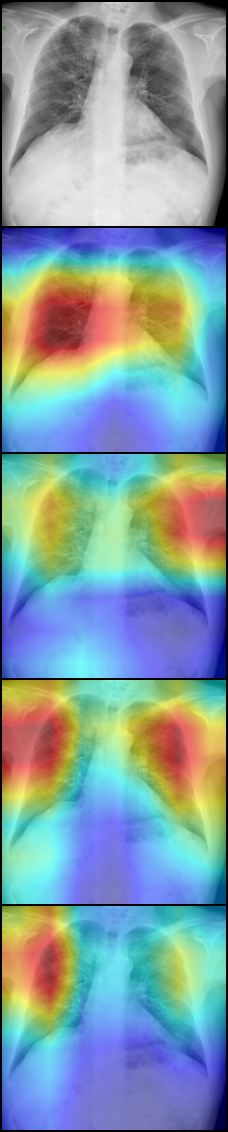

In [46]:
# Covid image for class idx 0
transforms.ToPILImage()(grid_image)

COVID-Image-3

In [55]:
covid_img_path ='/content/drive/MyDrive/val/covid/88de9d8c39e946abd495b37cd07d89e5-0666-0.jpg'

In [56]:
covid_pil_img = PIL.Image.open(covid_img_path).convert('RGB')

In [57]:
covid_torch_img = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])(covid_pil_img).to(device)

In [58]:
covid_normed_torch_img = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(covid_torch_img)[None]

In [59]:
configs = [
    dict(model_type='resnet', arch=model_resnet18, layer_name='layer4'),
    dict(model_type='resnet', arch=model_resnet50, layer_name='layer4'),
    dict(model_type='densenet', arch=model_densenet121, layer_name='features_norm5'),
    dict(model_type='densenet', arch=model_densenet201, layer_name='features_norm5')
]

In [60]:
for config in configs:
    config['arch'].to(device).eval()

cams = [
    [cls.from_config(**config) for cls in (GradCAM, GradCAMpp)]
    for config in configs
]

In [61]:
images = [covid_torch_img.cpu()]
for gradcam, gradcam_pp in cams:
    mask, logit = gradcam(covid_normed_torch_img, class_idx=0)
    heatmap, result = visualize_cam(mask, covid_torch_img)

    mask_pp, logit2 = gradcam_pp(covid_normed_torch_img, class_idx=0)
    heatmap_pp, result_pp = visualize_cam(mask_pp, covid_torch_img)
     
    images.extend([result])
    
grid_image = make_grid(images, nrow=1)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2952: UserWarning:

nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.



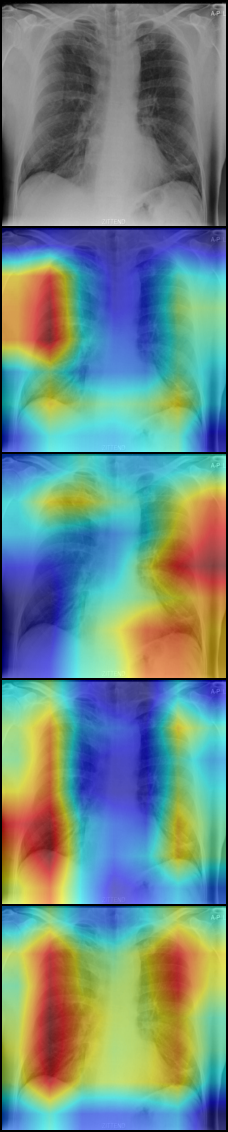

In [62]:
# Covid image for class idx 0
transforms.ToPILImage()(grid_image)

COVID-Image-4

In [71]:
covid_img_path ='/content/drive/MyDrive/val/covid/CD50BA96-6982-4C80-AE7B-5F67ACDBFA56.jpeg'

In [72]:
covid_pil_img = PIL.Image.open(covid_img_path).convert('RGB')

In [73]:
covid_torch_img = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])(covid_pil_img).to(device)

In [74]:
covid_normed_torch_img = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(covid_torch_img)[None]

In [75]:
configs = [
    dict(model_type='resnet', arch=model_resnet18, layer_name='layer4'),
    dict(model_type='resnet', arch=model_resnet50, layer_name='layer4'),
    dict(model_type='densenet', arch=model_densenet121, layer_name='features_norm5'),
    dict(model_type='densenet', arch=model_densenet201, layer_name='features_norm5')
]

In [76]:
for config in configs:
    config['arch'].to(device).eval()

cams = [
    [cls.from_config(**config) for cls in (GradCAM, GradCAMpp)]
    for config in configs
]

In [77]:
images = [covid_torch_img.cpu()]
for gradcam, gradcam_pp in cams:
    mask, logit = gradcam(covid_normed_torch_img, class_idx=0)
    heatmap, result = visualize_cam(mask, covid_torch_img)

    mask_pp, logit2 = gradcam_pp(covid_normed_torch_img, class_idx=0)
    heatmap_pp, result_pp = visualize_cam(mask_pp, covid_torch_img)
     
    images.extend([result])
    
grid_image = make_grid(images, nrow=1)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2952: UserWarning:

nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.



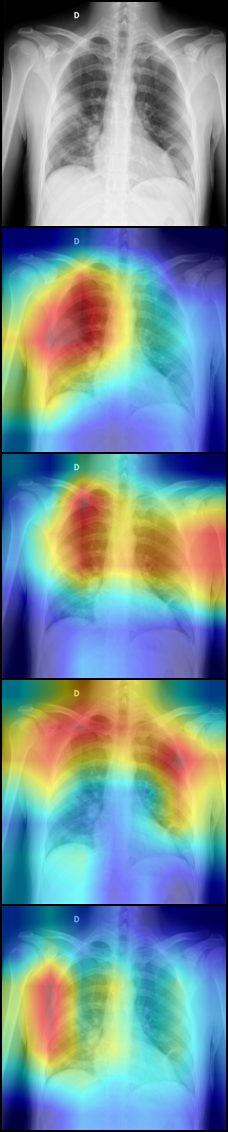

In [78]:
# Covid image for class idx 0
transforms.ToPILImage()(grid_image)

Grad-CAM Application on Non_COVID Images


Non_Covid Image 1

In [89]:
non_covid_img_path = '/content/drive/MyDrive/val/non/patient00004-study1-view1_frontal.jpg'

In [90]:
non_covid_pil_img = PIL.Image.open(non_covid_img_path).convert('RGB')

In [91]:
non_covid_torch_img = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])(non_covid_pil_img).to(device)

In [92]:
non_covid_normed_torch_img = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(non_covid_torch_img)[None]

In [93]:
configs = [
    dict(model_type='resnet', arch=model_resnet18, layer_name='layer4'),
    dict(model_type='resnet', arch=model_resnet50, layer_name='layer4'),
    dict(model_type='densenet', arch=model_densenet121, layer_name='features_norm5'),
    dict(model_type='densenet', arch=model_densenet201, layer_name='features_norm5')
]

In [94]:
for config in configs:
    config['arch'].to(device).eval()

cams = [
    [cls.from_config(**config) for cls in (GradCAM, GradCAMpp)]
    for config in configs
]

In [95]:
images = [non_covid_torch_img.cpu()]
for gradcam, gradcam_pp in cams:
    mask, logit = gradcam(non_covid_normed_torch_img, class_idx=0)
    heatmap, result = visualize_cam(mask, non_covid_torch_img)

    mask_pp, logit2 = gradcam_pp(non_covid_normed_torch_img, class_idx=0)
    heatmap_pp, result_pp = visualize_cam(mask_pp, non_covid_torch_img)
    
    images.extend([result])
    
grid_image = make_grid(images, nrow=1)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2952: UserWarning:

nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.



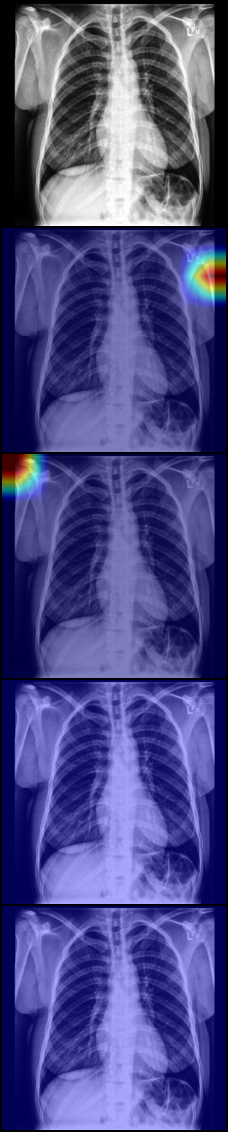

In [96]:
# Covid image for class idx 0
transforms.ToPILImage()(grid_image)

Non-Covid Image 2

In [104]:
non_covid_img_path = '/content/drive/MyDrive/val/non/patient00012-study1-view1_frontal.jpg'

In [105]:
non_covid_pil_img = PIL.Image.open(non_covid_img_path).convert('RGB')

In [106]:
non_covid_torch_img = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])(non_covid_pil_img).to(device)

In [107]:
non_covid_normed_torch_img = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(non_covid_torch_img)[None]

In [108]:
configs = [
    dict(model_type='resnet', arch=model_resnet18, layer_name='layer4'),
    dict(model_type='resnet', arch=model_resnet50, layer_name='layer4'),
    dict(model_type='densenet', arch=model_densenet121, layer_name='features_norm5'),
    dict(model_type='densenet', arch=model_densenet201, layer_name='features_norm5')
]

In [109]:
for config in configs:
    config['arch'].to(device).eval()

cams = [
    [cls.from_config(**config) for cls in (GradCAM, GradCAMpp)]
    for config in configs
]

In [110]:
images = [non_covid_torch_img.cpu()]
for gradcam, gradcam_pp in cams:
    mask, logit = gradcam(non_covid_normed_torch_img, class_idx=0)
    heatmap, result = visualize_cam(mask, non_covid_torch_img)

    mask_pp, logit2 = gradcam_pp(non_covid_normed_torch_img, class_idx=0)
    heatmap_pp, result_pp = visualize_cam(mask_pp, non_covid_torch_img)
    
    images.extend([result])
    
grid_image = make_grid(images, nrow=1)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2952: UserWarning:

nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.



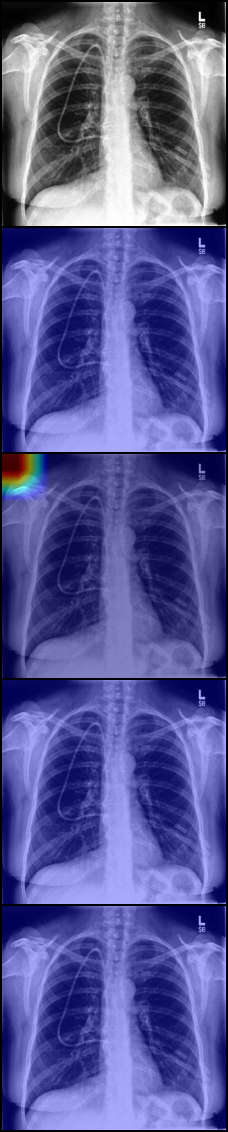

In [111]:
# Covid image for class idx 0
transforms.ToPILImage()(grid_image)

Non-Covid Image 3

In [119]:
non_covid_img_path = '/content/drive/MyDrive/val/non/patient00021-study1-view1_frontal.jpg'

In [120]:
non_covid_pil_img = PIL.Image.open(non_covid_img_path).convert('RGB')

In [121]:
non_covid_torch_img = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])(non_covid_pil_img).to(device)

In [122]:
non_covid_normed_torch_img = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(non_covid_torch_img)[None]

In [123]:
configs = [
    dict(model_type='resnet', arch=model_resnet18, layer_name='layer4'),
    dict(model_type='resnet', arch=model_resnet50, layer_name='layer4'),
    dict(model_type='densenet', arch=model_densenet121, layer_name='features_norm5'),
    dict(model_type='densenet', arch=model_densenet201, layer_name='features_norm5')
]

In [124]:
for config in configs:
    config['arch'].to(device).eval()

cams = [
    [cls.from_config(**config) for cls in (GradCAM, GradCAMpp)]
    for config in configs
]

In [125]:
images = [non_covid_torch_img.cpu()]
for gradcam, gradcam_pp in cams:
    mask, logit = gradcam(non_covid_normed_torch_img, class_idx=0)
    heatmap, result = visualize_cam(mask, non_covid_torch_img)

    mask_pp, logit2 = gradcam_pp(non_covid_normed_torch_img, class_idx=0)
    heatmap_pp, result_pp = visualize_cam(mask_pp, non_covid_torch_img)
    
    images.extend([result])
    
grid_image = make_grid(images, nrow=1)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2952: UserWarning:

nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.



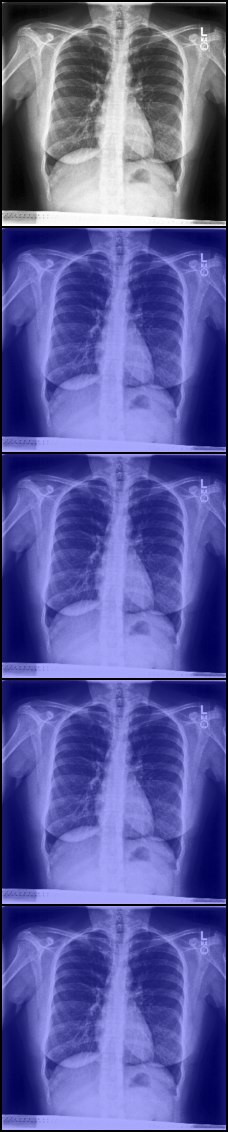

In [126]:
# Covid image for class idx 0
transforms.ToPILImage()(grid_image)

Non-Covid Image 4

In [135]:
non_covid_img_path = '/content/drive/MyDrive/val/non/patient00025-study1-view1_frontal.jpg'

In [136]:
non_covid_pil_img = PIL.Image.open(non_covid_img_path).convert('RGB')

In [137]:
non_covid_torch_img = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])(non_covid_pil_img).to(device)

In [138]:
non_covid_normed_torch_img = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(non_covid_torch_img)[None]

In [139]:
configs = [
    dict(model_type='resnet', arch=model_resnet18, layer_name='layer4'),
    dict(model_type='resnet', arch=model_resnet50, layer_name='layer4'),
    dict(model_type='densenet', arch=model_densenet121, layer_name='features_norm5'),
    dict(model_type='densenet', arch=model_densenet201, layer_name='features_norm5')
]

In [140]:
for config in configs:
    config['arch'].to(device).eval()

cams = [
    [cls.from_config(**config) for cls in (GradCAM, GradCAMpp)]
    for config in configs
]

In [141]:
images = [non_covid_torch_img.cpu()]
for gradcam, gradcam_pp in cams:
    mask, logit = gradcam(non_covid_normed_torch_img, class_idx=0)
    heatmap, result = visualize_cam(mask, non_covid_torch_img)

    mask_pp, logit2 = gradcam_pp(non_covid_normed_torch_img, class_idx=0)
    heatmap_pp, result_pp = visualize_cam(mask_pp, non_covid_torch_img)
    
    images.extend([result])
    
grid_image = make_grid(images, nrow=1)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2952: UserWarning:

nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.



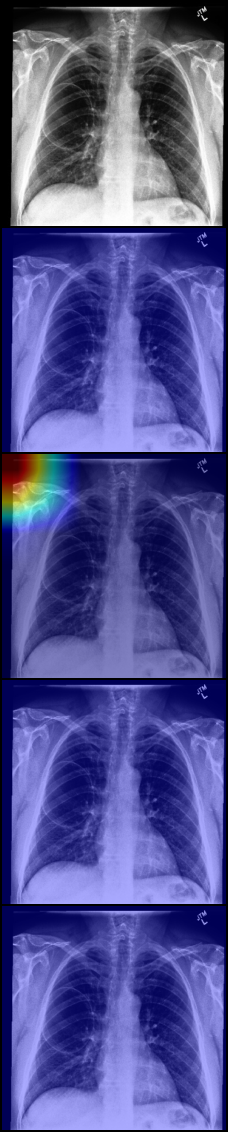

In [142]:
# Covid image for class idx 0
transforms.ToPILImage()(grid_image)